In [19]:
import pandas as pd
import matplotlib as sns
import numpy as np
%matplotlib inline
import plotly.express as pxx
import matplotlib.pyplot as plt

In [20]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [23]:
df = pd.read_excel('/content/document.xlsx')
df.head()


/usr/local/lib/python3.10/dist-packages/openpyxl/packaging/custom.py:212: UserWarning: Unknown type for AppVersion
  warn(f"Unknown type for {prop.name}")


,age,weight
0,130,40
1,131,48
2,132,72
3,133,39
4,134,87


Text(0, 0.5, 'weight')

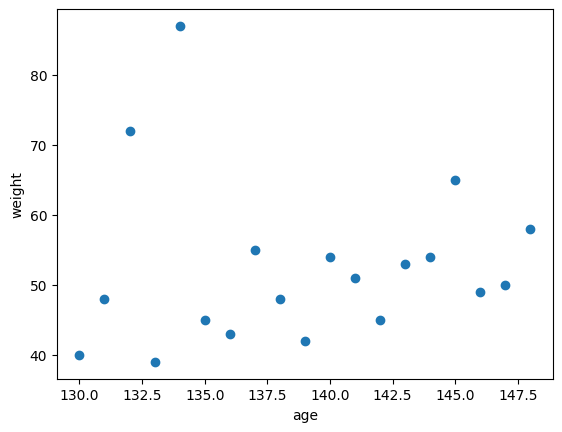

In [30]:
## scatter plot

plt.scatter (df['age'],df['weight'])
plt.xlabel("age")
plt.ylabel("weight")

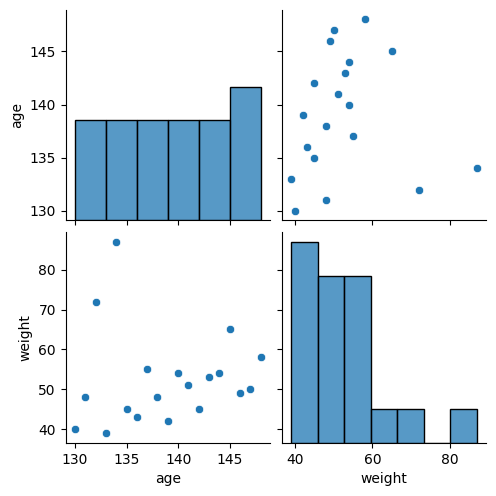

In [32]:
import seaborn as sns
sns.pairplot(df)

In [37]:
### independent and dpendeent features
x= df[["age"]]
np.array(x).shape ## 2d form


(19, 1)

In [41]:
y=df["weight"]
np.array(y).shape ## dependent features can be in 1d form or in series form


(19,)

In [45]:
from sklearn.model_selection import train_test_split
x_train , x_test, y_train, y_test = train_test_split ( x,y, test_size=0.25)

In [74]:
x_train

array([[ 1.12607797],
       [-1.59204127],
       [-1.41083332],
       [ 1.30728592],
       [-0.86720947],
       [ 0.94487002],
       [-0.68600152],
       [-1.22962537],
       [-0.32358562],
       [ 0.22003822],
       [ 0.03883027],
       [ 0.58245412],
       [ 1.48849387],
       [ 0.40124617]])

In [49]:
## Standardization
from sklearn.preprocessing import StandardScaler

In [71]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_train

array([[ 1.12607797],
       [-1.59204127],
       [-1.41083332],
       [ 1.30728592],
       [-0.86720947],
       [ 0.94487002],
       [-0.68600152],
       [-1.22962537],
       [-0.32358562],
       [ 0.22003822],
       [ 0.03883027],
       [ 0.58245412],
       [ 1.48849387],
       [ 0.40124617]])

In [52]:
x_test=scaler.transform(x_test)

In [53]:
x_test

array([[-1.04841742],
       [-1.77324922],
       [ 0.76366207],
       [-0.14237767],
       [-0.50479357]])

In [54]:
## Apply Simple Linear Regression
from sklearn.linear_model import LinearRegression

In [55]:
regression=LinearRegression(n_jobs=-1)

In [56]:
regression.fit(x_train,y_train)

LinearRegression(n_jobs=-1)

In [57]:
print("Coefficient or slope:",regression.coef_)
print("Intercept:",regression.intercept_)

Coefficient or slope: [1.46630514]
Intercept: 51.42857142857143


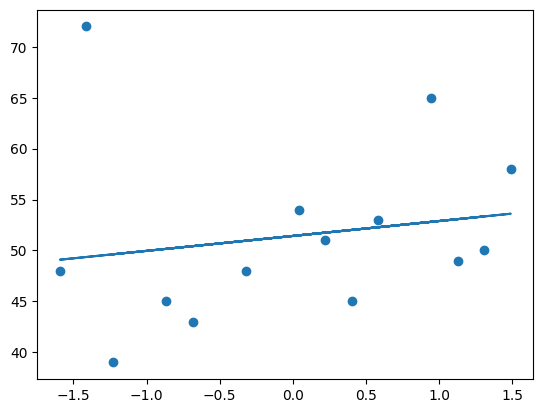

In [59]:
## plot Training data plot best fit line
plt.scatter(x_train,y_train)
plt.plot(x_train,regression.predict(x_train))

In [60]:
## Prediction for test data
y_pred=regression.predict(x_test)

In [61]:
## Performance Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [62]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

312.1402547944072
12.184050929803984
17.667491468638303


R square
Formula

R^2 = 1 - SSR/SST

R^2 = coefficient of determination SSR = sum of squares of residuals SST = total sum of squares

In [63]:
from sklearn.metrics import r2_score

In [64]:
score=r2_score(y_test,y_pred)
print(score)

-0.1012568966779821


In [65]:
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

-0.4683425289039762

In [66]:
## OLS Linear Regression
import statsmodels.api as sm

In [67]:
model=sm.OLS(y_train,x_train).fit()

In [68]:
prediction=model.predict(x_test)
print(prediction)

[-1.53729986 -2.60012445  1.11976163 -0.20876912 -0.74018141]


In [69]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 weight   R-squared (uncentered):                   0.001
Model:                            OLS   Adj. R-squared (uncentered):             -0.076
Method:                 Least Squares   F-statistic:                            0.01030
Date:                Tue, 17 Oct 2023   Prob (F-statistic):                       0.921
Time:                        08:59:20   Log-Likelihood:                         -75.209
No. Observations:                  14   AIC:                                      152.4
Df Residuals:                      13   BIC:                                      153.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [70]:
## Prediction For new data
regression.predict(scaler.transform([[72]]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([33.41749037])